In [414]:
# Rocky Kamen-Rubio HW02 Machine Learning for Molecular Simulations
# Much of this code was adapted from the example linear-regression.ipynb notebook provided. 

import numpy as np
import matplotlib.pyplot as plt

import torch
from torchmetrics.functional import r2_score, mean_squared_error, mean_absolute_error
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split

In [415]:
# check if a GPU is available
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cpu'

In [416]:
def f_linear(x, m, b):
    return m * x + b

In [417]:
# number of points
npoints = 500

# noise parameter
dmax1, dmax2, dmax3 = 1, 10, 20

# interval
min_val = 0
max_val = 9

# slope and offset
m = 2.0
b = 5.00

In [418]:
# generate data 
x1, x2, x3 = np.linspace(min_val, max_val, npoints), np.linspace(min_val, max_val, npoints), np.linspace(min_val, max_val, npoints)
y1, y2, y3 = f_linear(x1, m, b) + np.random.randn(npoints) * dmax1, f_linear(x2, m, b) + np.random.randn(npoints) * dmax2, f_linear(x3, m, b) + np.random.randn(npoints) * dmax3
y_orig1, y_orig2, y_orig3 = f_linear(x1, m, b), f_linear(x2, m, b), f_linear(x3, m, b)

# make the data two-dimensional (expected by the model). (-1, 1) means "make this into a column with the approrpiate number of rows. 
x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
x3 = x3.reshape(-1,1)

y1 = y1.reshape(-1,1)
y2 = y2.reshape(-1,1)
y3 = y3.reshape(-1,1)

y_orig1 = y_orig1.reshape(-1,1)
y_orig2 = y_orig2.reshape(-1,1)
y_orig3 = y_orig3.reshape(-1,1)

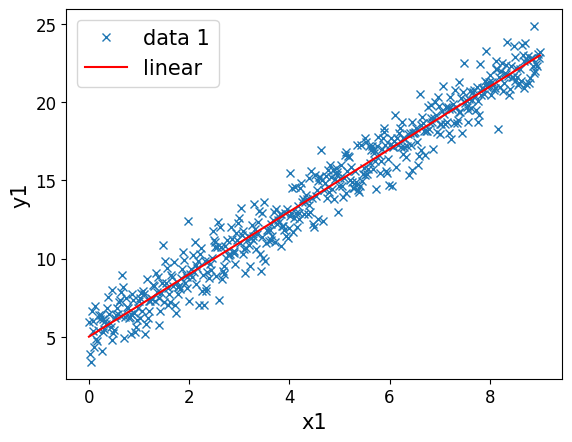

In [419]:
plt.plot(x1,y1, 'x', label = 'data 1')
plt.plot(x1,y_orig1,  label = 'linear',c="red")
plt.legend(fontsize=15)
plt.xlabel('x1', fontsize=15)
plt.ylabel('y1', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

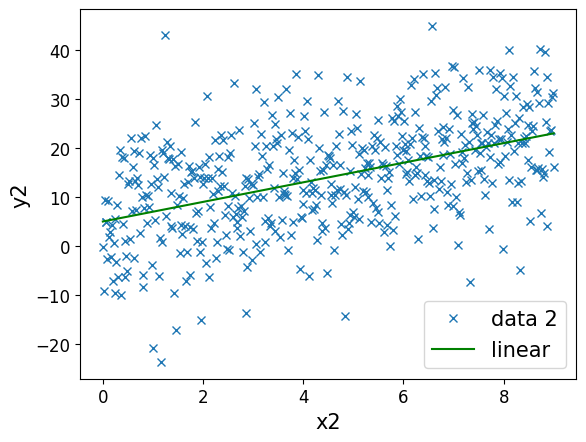

In [420]:
plt.plot(x2,y2, 'x', label = 'data 2')
plt.plot(x2,y_orig2,  label = 'linear',c="green")
plt.legend(fontsize=15)
plt.xlabel('x2', fontsize=15)
plt.ylabel('y2', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

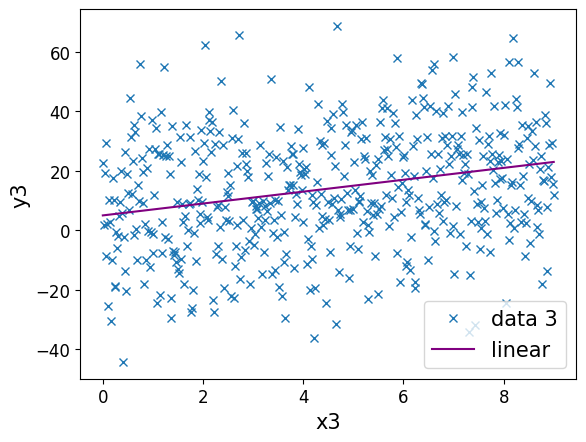

In [421]:
plt.plot(x3,y3, 'x', label = 'data 3')
plt.plot(x3,y_orig3,  label = 'linear',c="purple")
plt.legend(fontsize=15)
plt.xlabel('x3', fontsize=15)
plt.ylabel('y3', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [422]:
class Data(Dataset):
  """Dataset wrapper. Takes numpy arrays and stores them as torch tensors.
    Data is transformed to the device."""
  def __init__(self, x: np.ndarray,
                y: np.ndarray,
                device: str = DEVICE):
    self.x = torch.from_numpy(x).float().to(device)
    self.y =  torch.from_numpy(y).float().to(device)
    self.len = self.x.shape[0]
  
  def __getitem__(self, index: int) -> tuple:
    return self.x[index].float(), self.y[index].float()
  
  def __len__(self) -> int:
    return self.len

In [423]:
# define fraction of data used for training
train_fraction = .8
n_train = int(train_fraction * npoints)

# get indices for training and test set
ids = np.arange(npoints)
np.random.shuffle(ids)
ids_train, ids_test  = np.split(ids, [n_train])

# generate datasets for training and testing        
train_data1 = Data(x1[ids_train], y1[ids_train])
test_data1 = Data(x1[ids_test], y1[ids_test])

train_data2 = Data(x2[ids_train], y2[ids_train])
test_data2 = Data(x2[ids_test], y2[ids_test])

train_data3 = Data(x3[ids_train], y3[ids_train])
test_data3 = Data(x3[ids_test], y3[ids_test])

In [424]:
print("The length of train data is:",len(train_data1))
print("The length of test data is:",len(test_data1))

print("The length of train data is:",len(train_data2))
print("The length of test data is:",len(test_data2))

print("The length of train data is:",len(train_data3))
print("The length of test data is:",len(test_data3))

The length of train data is: 400
The length of test data is: 100
The length of train data is: 400
The length of test data is: 100
The length of train data is: 400
The length of test data is: 100


In [425]:
batch_size = 16

trainloader1 = DataLoader(train_data1, 
                         batch_size=batch_size, 
                         shuffle=True)
testloader1 = DataLoader(test_data1, 
                         batch_size=batch_size, 
                         shuffle=True)

trainloader2 = DataLoader(train_data2, 
                         batch_size=batch_size, 
                         shuffle=True)
testloader2 = DataLoader(test_data2, 
                         batch_size=batch_size, 
                         shuffle=True)

trainloader3 = DataLoader(train_data3, 
                         batch_size=batch_size, 
                         shuffle=True)
testloader3 = DataLoader(test_data3, 
                         batch_size=batch_size, 
                         shuffle=True)

In [426]:
# PLOT TRAINING AND VALIDATION DATA

In [427]:
# fit the data with a linear regression model:
# y(w,x) = b + w1*x1 + w2*x2 + ... + wp*xp
# here we only fit b and w1, since we have 1D data
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(in_features=1,
                                      out_features=1,bias=True)

    def forward(self, x):
        out = self.linear(x)
        return out

In [428]:
learningRate = 0.01 
n_epochs = 100

# generate a model and move it to the device
model1 = LinearRegression().to(DEVICE)
model2 = LinearRegression().to(DEVICE)
model3 = LinearRegression().to(DEVICE)

In [429]:
# print(model)

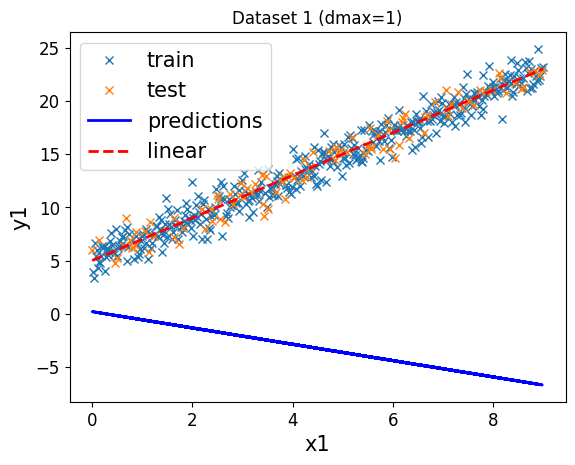

In [430]:
# Get model predictions for the test set
# we disable gradients because we are not in training mode here
# and get problems with numpy functions (used in the plotting routines)
with torch.no_grad():
    y_pred_test1 = model1(test_data1.x)
    y_pred_test2 = model2(test_data2.x)
    y_pred_test3 = model3(test_data3.x)

plt.plot(train_data1.x ,train_data1.y, 'x', label = 'train')
plt.plot(test_data1.x, test_data1.y, 'x', label = 'test')

# Plot the predicted data 
plt.plot(test_data1.x, y_pred_test1,c="blue", label = 'predictions',linewidth=2)
plt.plot(x1,y_orig1,  label = 'linear',c="red",linestyle="dashed",linewidth=2)
plt.legend(fontsize=15)

plt.xlabel('x1', fontsize=15)
plt.ylabel('y1', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Dataset 1 (dmax=1)')
plt.show()



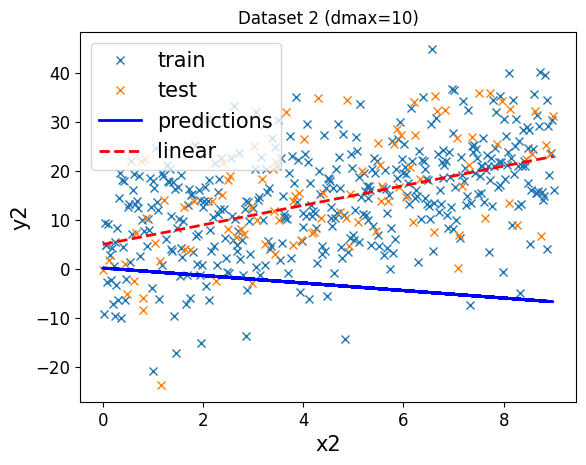

In [431]:
plt.plot(train_data2.x ,train_data2.y, 'x', label = 'train')
plt.plot(test_data2.x, test_data2.y, 'x', label = 'test')

# Plot the predicted data 
plt.plot(test_data2.x, y_pred_test1,c="blue", label = 'predictions',linewidth=2)
plt.plot(x2,y_orig1,  label = 'linear',c="red",linestyle="dashed",linewidth=2)
plt.legend(fontsize=15)

plt.xlabel('x2', fontsize=15)
plt.ylabel('y2', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Dataset 2 (dmax=10)")
plt.show()


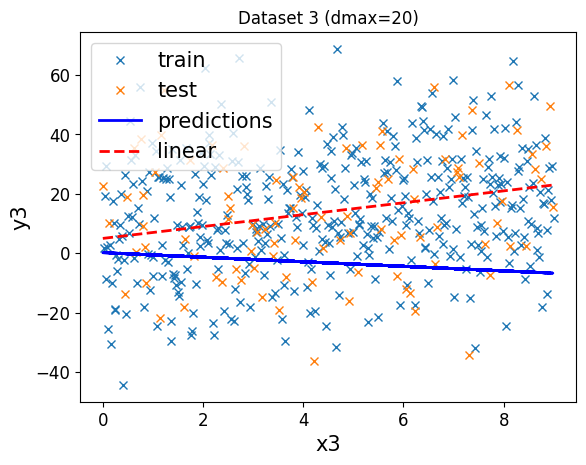

In [432]:
plt.plot(train_data3.x ,train_data3.y, 'x', label = 'train')
plt.plot(test_data3.x, test_data3.y, 'x', label = 'test')

# Plot the predicted data 
plt.plot(test_data3.x, y_pred_test1,c="blue", label = 'predictions',linewidth=2)
plt.plot(x3,y_orig1,  label = 'linear',c="red",linestyle="dashed",linewidth=2)
plt.legend(fontsize=15)

plt.xlabel('x3', fontsize=15)
plt.ylabel('y3', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Dataset 3 (dmax=20)")
plt.show()

In [469]:
print(y_pred_test1.shape)
print(test_data1.y.shape)
r2_score(y_pred_test1, test_data1.y)

torch.Size([100, 1])
torch.Size([100, 1])


tensor(0.9597)

In [434]:
print('Dataset 1 R2 score = ', r2_score(y_pred_test1, test_data1.y))

print("Dataset 1 MSE before training = {}".format(mean_squared_error(y_pred_test1, test_data1.y)))
print("Dataset 1 MAE before training = {}".format(mean_absolute_error(y_pred_test1, test_data1.y)))

print('Dataset 2 R2 score = ', r2_score(y_pred_test2, test_data2.y))

print("Dataset 2 MSE before training = {}".format(mean_squared_error(y_pred_test2, test_data2.y)))
print("Dataset 2 MAE before training = {}".format(mean_absolute_error(y_pred_test2, test_data2.y)))

print('Dataset 3 R2 score = ', r2_score(y_pred_test3, test_data3.y))


print("Dataset 3 MSE before training = {}".format(mean_squared_error(y_pred_test3, test_data3.y)))
print("Dataset 3 MAE before training = {}".format(mean_absolute_error(y_pred_test3, test_data3.y)))



Dataset 1 R2 score =  tensor(-12.3713)
Dataset 1 MSE before training = 345.1030578613281
Dataset 1 MAE before training = 17.222122192382812
Dataset 2 R2 score =  tensor(-1.5162)
Dataset 2 MSE before training = 332.9820251464844
Dataset 2 MAE before training = 15.471558570861816
Dataset 3 R2 score =  tensor(-0.7785)
Dataset 3 MSE before training = 719.0262451171875
Dataset 3 MAE before training = 21.822237014770508


In [435]:
# criterion to computes the loss between input and target
criterion = nn.MSELoss()

# optimizer that will be used to update weights and biases
optimizer1 = torch.optim.SGD(model1.parameters(), lr=1e-2)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=1e-2)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=1e-2)

In [436]:
n_epochs = 1000
losses1 = np.empty(n_epochs)
n_log = 50

for epoch in range(n_epochs):
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(trainloader1):
    outputs = model1(inputs)
    
    # compute loss
    loss = criterion(outputs, labels)   
    
    # set optimizer to zero grad to remove previous gradients
    optimizer1.zero_grad()    # backward propagation
    
    # get gradients
    loss.backward()

    # gradient descent
    optimizer1.step() 
    
    losses1[epoch] = loss.item() # store loss

  if epoch % n_log == 0:
    print(f'Epochs:{epoch :5d} | ' \
          f'Loss: {loss :.10f}')

Epochs:    0 | Loss: 4.6405978203
Epochs:   50 | Loss: 0.5691815019
Epochs:  100 | Loss: 1.1022136211
Epochs:  150 | Loss: 2.0422723293
Epochs:  200 | Loss: 1.0710738897
Epochs:  250 | Loss: 1.3663096428
Epochs:  300 | Loss: 1.5235881805
Epochs:  350 | Loss: 0.7974928021
Epochs:  400 | Loss: 1.6371248960
Epochs:  450 | Loss: 0.5084913373
Epochs:  500 | Loss: 1.0020092726
Epochs:  550 | Loss: 0.8261019588
Epochs:  600 | Loss: 1.3444707394
Epochs:  650 | Loss: 0.8649895787
Epochs:  700 | Loss: 1.1353337765
Epochs:  750 | Loss: 0.7308888435
Epochs:  800 | Loss: 0.4561959207
Epochs:  850 | Loss: 1.7674939632
Epochs:  900 | Loss: 1.6631506681
Epochs:  950 | Loss: 0.9153413177


In [437]:
n_epochs = 1000
losses2 = np.empty(n_epochs)
n_log = 50

for epoch in range(n_epochs):
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(trainloader2):
    outputs = model2(inputs)
    
    # compute loss
    loss = criterion(outputs, labels)   
    
    # set optimizer to zero grad to remove previous gradients
    optimizer2.zero_grad()    # backward propagation
    
    # get gradients
    loss.backward()

    # gradient descent
    optimizer2.step() 
    
    losses2[epoch] = loss.item() # store loss

  if epoch % n_log == 0:
    print(f'Epochs:{epoch :5d} | ' \
          f'Loss: {loss :.10f}')

Epochs:    0 | Loss: 70.4828109741
Epochs:   50 | Loss: 114.6295166016
Epochs:  100 | Loss: 108.6418762207
Epochs:  150 | Loss: 77.5727081299
Epochs:  200 | Loss: 159.1984863281
Epochs:  250 | Loss: 101.1611480713
Epochs:  300 | Loss: 84.1928405762
Epochs:  350 | Loss: 64.0066909790
Epochs:  400 | Loss: 97.9296035767
Epochs:  450 | Loss: 207.7839508057
Epochs:  500 | Loss: 76.5864181519
Epochs:  550 | Loss: 71.9556274414
Epochs:  600 | Loss: 67.7182617188
Epochs:  650 | Loss: 79.5406417847
Epochs:  700 | Loss: 34.7440223694
Epochs:  750 | Loss: 66.6201782227
Epochs:  800 | Loss: 41.2813568115
Epochs:  850 | Loss: 20.5983963013
Epochs:  900 | Loss: 72.0849761963
Epochs:  950 | Loss: 90.2070236206


In [438]:
n_epochs = 1000
losses3 = np.empty(n_epochs)
n_log = 50

for epoch in range(n_epochs):
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(trainloader3):
    outputs = model3(inputs)
    
    # compute loss
    loss = criterion(outputs, labels)   
    
    # set optimizer to zero grad to remove previous gradients
    optimizer3.zero_grad()    # backward propagation
    
    # get gradients
    loss.backward()

    # gradient descent
    optimizer3.step() 
    
    losses3[epoch] = loss.item() # store loss

  if epoch % n_log == 0:
    print(f'Epochs:{epoch :5d} | ' \
          f'Loss: {loss :.10f}')

Epochs:    0 | Loss: 255.8645324707
Epochs:   50 | Loss: 197.8233032227
Epochs:  100 | Loss: 296.0794982910
Epochs:  150 | Loss: 332.9682617188
Epochs:  200 | Loss: 257.3781127930
Epochs:  250 | Loss: 388.7177734375
Epochs:  300 | Loss: 142.7845611572
Epochs:  350 | Loss: 480.7984008789
Epochs:  400 | Loss: 269.5455627441
Epochs:  450 | Loss: 235.2082366943
Epochs:  500 | Loss: 323.6203308105
Epochs:  550 | Loss: 391.8962707520
Epochs:  600 | Loss: 215.5503082275
Epochs:  650 | Loss: 250.0860443115
Epochs:  700 | Loss: 408.2795104980
Epochs:  750 | Loss: 273.0630493164
Epochs:  800 | Loss: 408.6438293457
Epochs:  850 | Loss: 355.8212280273
Epochs:  900 | Loss: 233.6224975586
Epochs:  950 | Loss: 440.9896240234


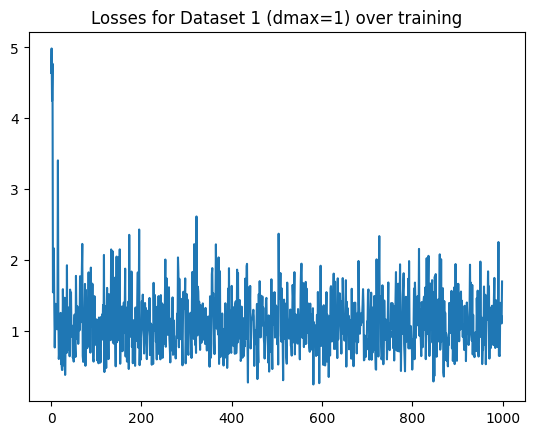

In [439]:
plt.plot(losses1)
plt.title("Losses for Dataset 1 (dmax=1) over training")
plt.show()

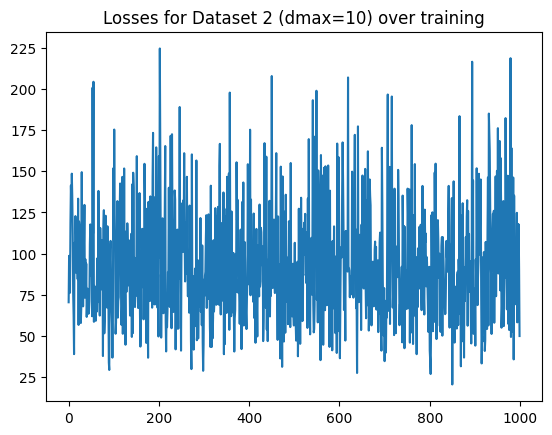

In [440]:
plt.plot(losses2)
plt.title("Losses for Dataset 2 (dmax=10) over training")

plt.show()

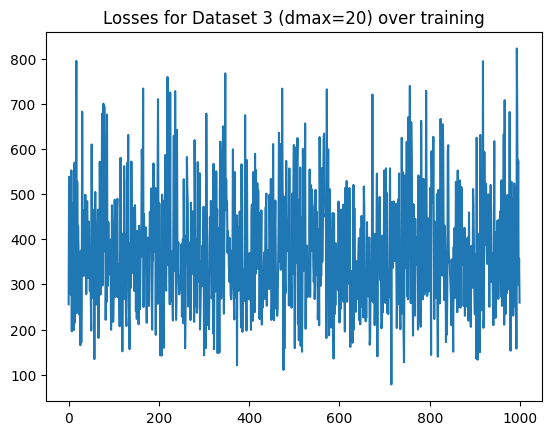

In [441]:
plt.plot(losses3)
plt.title("Losses for Dataset 3 (dmax=20) over training")

plt.show()

In [442]:
# get predictions for training and test set
with torch.no_grad():
    y_pred_train1 = model1(train_data1.x)
    y_pred_test1 = model1(test_data1.x)

    y_pred_train2 = model2(train_data2.x)
    y_pred_test2 = model2(test_data2.x)

    y_pred_train3 = model3(train_data3.x)
    y_pred_test3 = model3(test_data3.x)


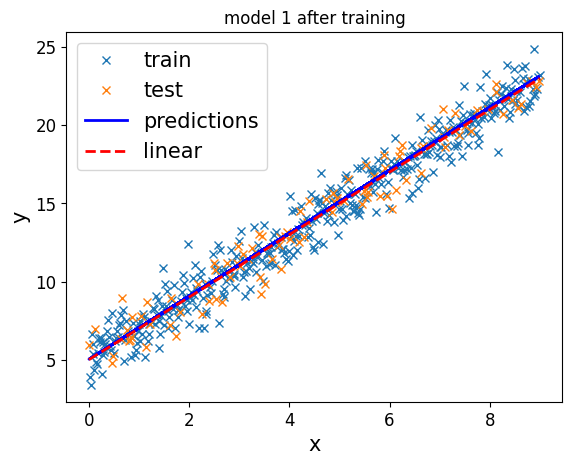

In [443]:
plt.plot(train_data1.x ,train_data1.y, 'x', label = 'train')
plt.plot(test_data1.x, test_data1.y, 'x', label = 'test')

# Plot the predicted data 
plt.plot(test_data1.x, y_pred_test1,c="blue", label = 'predictions',linewidth=2)
plt.plot(x1,y_orig1,  label = 'linear',c="red",linestyle="dashed",linewidth=2)
plt.legend(fontsize=15)

plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("model 1 after training")
plt.show()

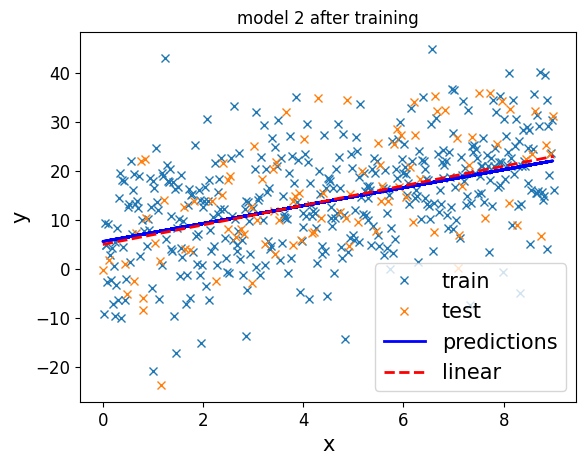

In [444]:
plt.plot(train_data2.x ,train_data2.y, 'x', label = 'train')
plt.plot(test_data2.x, test_data2.y, 'x', label = 'test')

# Plot the predicted data 
plt.plot(test_data2.x, y_pred_test2,c="blue", label = 'predictions',linewidth=2)
plt.plot(x1,y_orig2,  label = 'linear',c="red",linestyle="dashed",linewidth=2)
plt.legend(fontsize=15)

plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("model 2 after training")
plt.show()

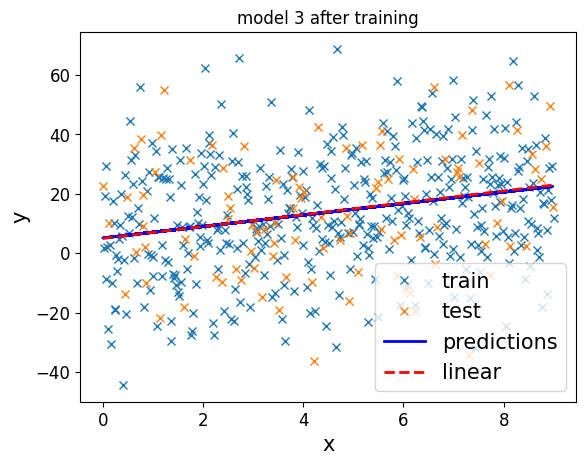

In [445]:
plt.plot(train_data3.x ,train_data3.y, 'x', label = 'train')
plt.plot(test_data3.x, test_data3.y, 'x', label = 'test')

# Plot the predicted data 
plt.plot(test_data3.x, y_pred_test3,c="blue", label = 'predictions',linewidth=2)
plt.plot(x1,y_orig3,  label = 'linear',c="red",linestyle="dashed",linewidth=2)
plt.legend(fontsize=15)

plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("model 3 after training")
plt.show()

In [446]:
print('Dataset 1 R2 score = %8.5f' % r2_score(y_pred_test1, test_data1.y))
print('Dataset 2 R2 score = %8.5f' % r2_score(y_pred_test2, test_data2.y))
print('Dataset 3 R2 score = %8.5f' % r2_score(y_pred_test3, test_data3.y))


Dataset 1 R2 score =  0.95971
Dataset 2 R2 score =  0.28335
Dataset 3 R2 score =  0.03423


In [447]:
mse_test1 = mean_squared_error(test_data1.y,y_pred_test1)
mse_train1 = mean_squared_error(train_data1.y,y_pred_train1)

mae_test1 = mean_absolute_error(test_data1.y,y_pred_test1)
mae_train1 = mean_absolute_error(train_data1.y,y_pred_train1)

print('MSE test1  = %8.4f    MAE test  = %8.4f' % (mse_test1,mae_test1))
print('MSE train1 = %8.4f    MAE train = %8.4f' % (mse_train1,mae_train1))

MSE test1  =   1.0398    MAE test  =   0.8108
MSE train1 =   1.1114    MAE train =   0.8200


In [448]:
mse_test2 = mean_squared_error(test_data2.y,y_pred_test2)
mse_train2 = mean_squared_error(train_data2.y,y_pred_train2)

mae_test2 = mean_absolute_error(y_pred_test2, test_data2.y)
mae_train2 = mean_absolute_error(y_pred_test2, test_data2.y)

print('MSE test2  = %8.4f    MAE test  = %8.4f' % (mse_test2,mae_test2))
print('MSE train2 = %8.4f    MAE train = %8.4f' % (mse_train2,mae_train2))

MSE test2  =  94.8385    MAE test  =   7.8379
MSE train2 =  92.2691    MAE train =   7.8379


In [449]:
mse_test3 = mean_squared_error(test_data3.y,y_pred_test3)
mse_train3 = mean_squared_error(train_data3.y,y_pred_train3)

mae_test3 = mean_absolute_error(test_data1.y,y_pred_test3)
mae_train3 = mean_absolute_error(train_data1.y,y_pred_train3)

print('MSE test1  = %8.4f    MAE test  = %8.4f' % (mse_test3,mae_test3))
print('MSE train1 = %8.4f    MAE train = %8.4f' % (mse_train3,mae_train3))

MSE test1  = 390.4564    MAE test  =   0.8437
MSE train1 = 367.4454    MAE train =   0.8295


In [450]:
class PTMinMaxScaler(object):
    """"Scaler class for min-max scaling."""
    def __init__(self, tensor, new_max, new_min):
        self.v_min, self.v_max = tensor.min(), tensor.max()
        self.new_max, self.new_min = new_max, new_min

    def scale(self, tensor):
        return (tensor - self.v_min)/(self.v_max - self.v_min)*(self.new_max - self.new_min) + self.new_min

    def inverse_scale(self, tensor):
        return (tensor - self.new_min) * (self.v_max - self.v_min)/(self.new_max - self.new_min) + self.v_min



In [451]:
# number of points
npoints4 = 500

# noise parameter
dmax4 = 1

# interval
min_val4 = 0
max_val4 = 100

# slope and offset
m4 = 2.0
b4 = 5.00

x4 = np.linspace(min_val4, max_val4, npoints4)
y4 = f_linear(x4, m4, b4) + np.random.randn(npoints4) * dmax4

y_orig4 = f_linear(x4, m4, b4)

# make the data two-dimensional (expected by the model)
x4 = x4.reshape(-1,1)
y4 = y4.reshape(-1,1)
# x4_scaled = x4_scaled.reshape(-1,1)
# y4_scaled = y4_scaled.reshape(-1,1)
y_orig4 = y_orig4.reshape(-1,1)

x4_scaler_obj = PTMinMaxScaler(x4, 1. , 0.)
y4_scaler_obj = PTMinMaxScaler(y4, 1. , 0.)

x4_scaled = x4_scaler_obj.scale(x4)
y4_scaled = y4_scaler_obj.scale(y4)

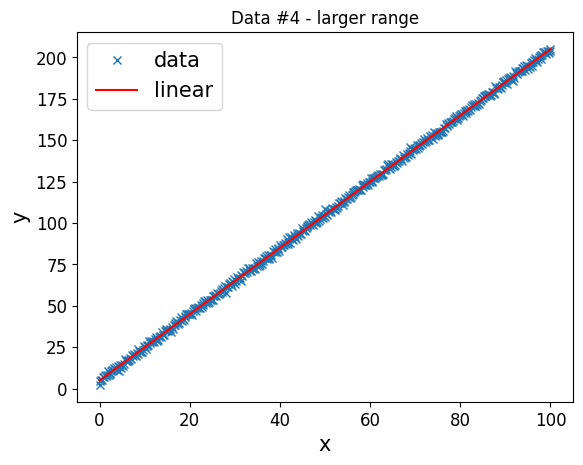

In [452]:
plt.plot(x4,y4, 'x', label = 'data')
plt.plot(x4,y_orig4,  label = 'linear',c="red")
plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Data #4 - larger range")
plt.show()

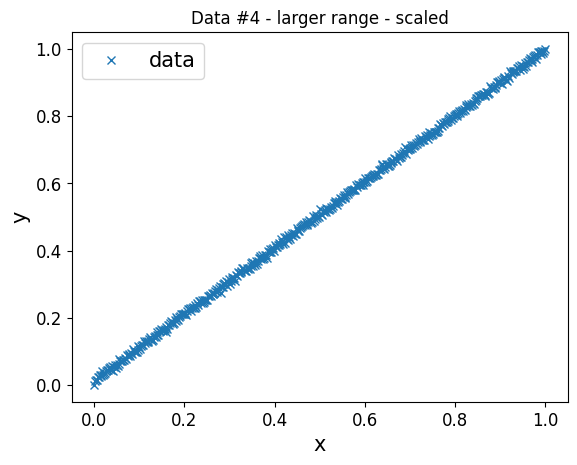

In [453]:
plt.plot(x4_scaled, y4_scaled, 'x', label = 'data')
# plt.plot(x4_scaled.scale(x4),y_orig4,  label = 'linear',c="red")
plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Data #4 - larger range - scaled")
plt.show()

In [454]:
# generate datasets for training and testing        
train_data4 = Data(x4[ids_train], y4[ids_train])
test_data4 = Data(x4[ids_test], y4[ids_test])

train_data4_scaled = Data(x4_scaled[ids_train], y4_scaled[ids_train])
test_data4_scaled = Data(x4_scaled[ids_test], y4_scaled[ids_test])

trainloader4 = DataLoader(train_data4, 
                         batch_size=batch_size, 
                         shuffle=True)
testloader4 = DataLoader(test_data4, 
                         batch_size=batch_size, 
                         shuffle=True)

trainloader4_scaled = DataLoader(train_data4_scaled, 
                         batch_size=batch_size, 
                         shuffle=True)
testloader4_scaled = DataLoader(test_data4_scaled, 
                         batch_size=batch_size, 
                         shuffle=True)

learningRate4 = 0.00000001 
# n_epochs4 = 100
criterion4 = nn.MSELoss()

# generate a model and move it to the device
model4 = LinearRegression().to(DEVICE)

with torch.no_grad():
    y_pred_test4 = model4(test_data4.x)
optimizer4 = torch.optim.SGD(model4.parameters(), lr=learningRate4)

In [455]:
n_epochs = 3000
losses4 = np.empty(n_epochs)
n_log = 50

for epoch in range(n_epochs):
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(trainloader4):
    outputs = model4(inputs)
    
    # compute loss
    loss = criterion4(outputs, labels)  
    
    # set optimizer to zero grad to remove previous gradients
    optimizer4.zero_grad()    # backward propagation
    
    # get gradients
    loss.backward()

    # gradient descent
    optimizer4.step() 
    
    losses4[epoch] = loss.item() # store loss

  if epoch % n_log == 0:
    print(f'Epochs:{epoch :5d} | ' \
          f'Loss: {loss :.10f}')



Epochs:    0 | Loss: 10708.8535156250
Epochs:   50 | Loss: 6850.0346679688
Epochs:  100 | Loss: 6193.1250000000
Epochs:  150 | Loss: 6221.7753906250
Epochs:  200 | Loss: 4348.1264648438
Epochs:  250 | Loss: 4130.3520507812
Epochs:  300 | Loss: 2253.1811523438
Epochs:  350 | Loss: 2302.4143066406
Epochs:  400 | Loss: 1659.0747070312
Epochs:  450 | Loss: 1861.3690185547
Epochs:  500 | Loss: 1972.0236816406
Epochs:  550 | Loss: 1185.4389648438
Epochs:  600 | Loss: 1093.0141601562
Epochs:  650 | Loss: 1152.9010009766
Epochs:  700 | Loss: 791.4747314453
Epochs:  750 | Loss: 663.3641357422
Epochs:  800 | Loss: 639.5924682617
Epochs:  850 | Loss: 473.9413146973
Epochs:  900 | Loss: 355.3376464844
Epochs:  950 | Loss: 362.1458129883
Epochs: 1000 | Loss: 281.9960632324
Epochs: 1050 | Loss: 239.0895385742
Epochs: 1100 | Loss: 199.2281646729
Epochs: 1150 | Loss: 164.9835052490
Epochs: 1200 | Loss: 125.1223297119
Epochs: 1250 | Loss: 131.8141326904
Epochs: 1300 | Loss: 136.3895263672
Epochs: 1350 

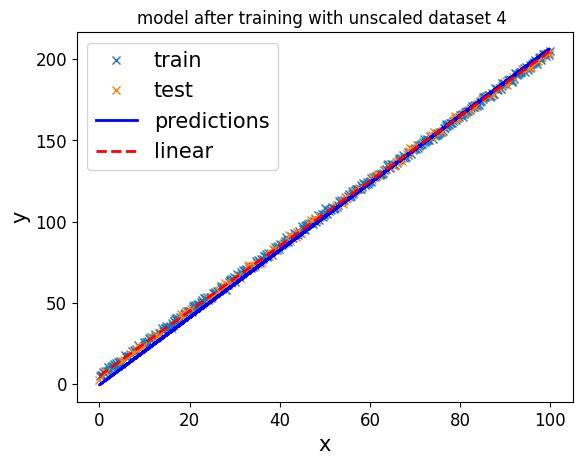

In [456]:
with torch.no_grad():
    y_pred_test4 = model4(test_data4.x)

plt.plot(train_data4.x ,train_data4.y, 'x', label = 'train')
plt.plot(test_data4.x, test_data4.y, 'x', label = 'test')

# Plot the predicted data 
plt.plot(test_data4.x, y_pred_test4,c="blue", label = 'predictions',linewidth=2)
plt.plot(x4,y_orig4,  label = 'linear',c="red",linestyle="dashed",linewidth=2)
plt.legend(fontsize=15)

plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("model after training with unscaled dataset 4 ")
plt.show()

In [457]:
mean_squared_error(test_data4.y, y_pred_test4)

tensor(7.6495)

In [458]:
mean_absolute_error(test_data4.y, y_pred_test4)

tensor(2.3219)

In [459]:
r2_score(test_data4.y, y_pred_test4)

tensor(0.9977)

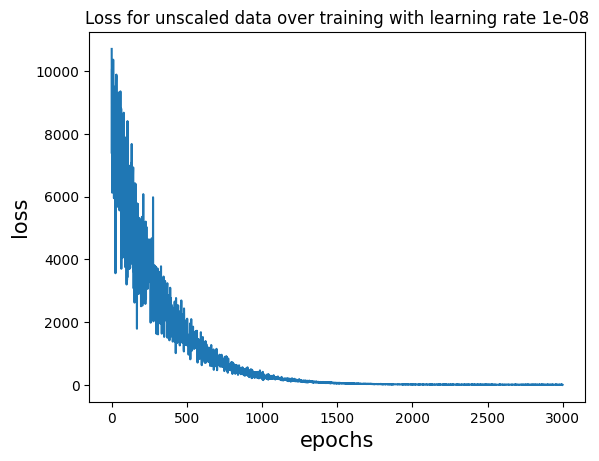

In [460]:
plt.plot(losses4)
plt.title(f"Loss for unscaled data over training with learning rate {learningRate4}")
plt.xlabel('epochs', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.show()

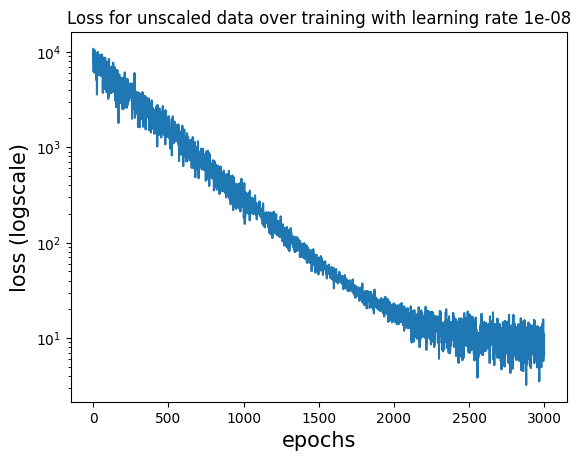

In [461]:
plt.yscale("log")
plt.plot(losses4)
plt.title(f"Loss for unscaled data over training with learning rate {learningRate4}")
plt.xlabel('epochs', fontsize=15)
plt.ylabel('loss (logscale)', fontsize=15)
plt.show()

In [462]:
learningRate4_scaled = 0.001
# n_epochs4 = 100
criterion4_scaled = nn.MSELoss()

# generate a model and move it to the device
model4_scaled = LinearRegression().to(DEVICE)

with torch.no_grad():
    y_pred_test4_scaled = model4_scaled(test_data4_scaled.x)
optimizer4_scaled = torch.optim.SGD(model4_scaled.parameters(), lr=learningRate4_scaled)


n_epochs_scaled = 1500
losses4_scaled = np.empty(n_epochs_scaled)
n_log = 50

for epoch in range(n_epochs_scaled):
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(trainloader4_scaled):
    outputs = model4_scaled(inputs)
    
    # compute loss
    loss = criterion4(outputs, labels)  
    
    # set optimizer to zero grad to remove previous gradients
    optimizer4_scaled.zero_grad()    # backward propagation
    
    # get gradients
    loss.backward()

    # gradient descent
    optimizer4_scaled.step() 
    
    losses4_scaled[epoch] = loss.item() # store loss

  if epoch % n_log == 0:
    print(f'Epochs:{epoch :5d} | ' \
          f'Loss: {loss :.10f}')



Epochs:    0 | Loss: 1.0513920784
Epochs:   50 | Loss: 0.0657582060
Epochs:  100 | Loss: 0.0440151580
Epochs:  150 | Loss: 0.0326342098
Epochs:  200 | Loss: 0.0270459782
Epochs:  250 | Loss: 0.0175025128
Epochs:  300 | Loss: 0.0093142400
Epochs:  350 | Loss: 0.0071331169
Epochs:  400 | Loss: 0.0063326033
Epochs:  450 | Loss: 0.0049887826
Epochs:  500 | Loss: 0.0026326997
Epochs:  550 | Loss: 0.0025428177
Epochs:  600 | Loss: 0.0019771913
Epochs:  650 | Loss: 0.0012338237
Epochs:  700 | Loss: 0.0006694499
Epochs:  750 | Loss: 0.0006567776
Epochs:  800 | Loss: 0.0003454946
Epochs:  850 | Loss: 0.0003744668
Epochs:  900 | Loss: 0.0002005352
Epochs:  950 | Loss: 0.0001149706
Epochs: 1000 | Loss: 0.0001141790
Epochs: 1050 | Loss: 0.0000927306
Epochs: 1100 | Loss: 0.0001531623
Epochs: 1150 | Loss: 0.0000497170
Epochs: 1200 | Loss: 0.0000318260
Epochs: 1250 | Loss: 0.0000522716
Epochs: 1300 | Loss: 0.0000379050
Epochs: 1350 | Loss: 0.0000359820
Epochs: 1400 | Loss: 0.0000363659
Epochs: 1450 |

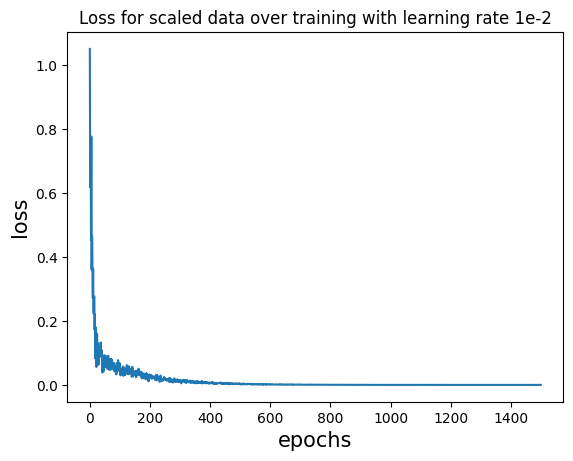

In [463]:
plt.plot(losses4_scaled)
plt.title(f"Loss for scaled data over training with learning rate 1e-2")
plt.xlabel('epochs', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.show()

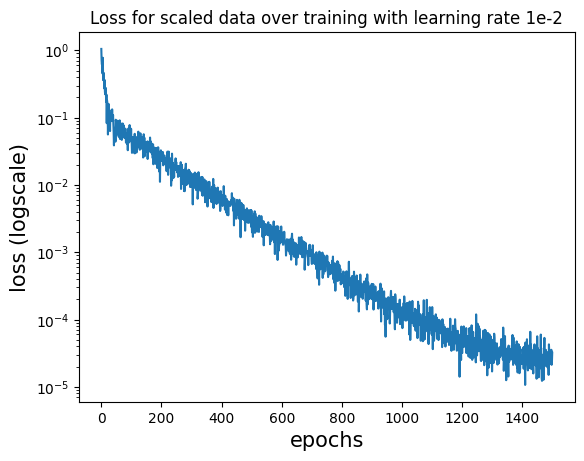

In [464]:
plt.yscale("log")
plt.plot(losses4_scaled)
plt.title(f"Loss for scaled data over training with learning rate 1e-2")
plt.xlabel('epochs', fontsize=15)
plt.ylabel('loss (logscale)', fontsize=15)
plt.show()

In [465]:
with torch.no_grad():
    y_pred_test4_scaled = model4_scaled(test_data4_scaled.x)

#we have to unscale the data to get accurate error comparison, else it will be artificially small

test_y_unscaled = y4_scaler_obj.inverse_scale(test_data4_scaled.y)
y_pred_test4_unscaled = y4_scaler_obj.inverse_scale(y_pred_test4_scaled)


mse_test_scaled = mean_squared_error(test_y_unscaled, y_pred_test4_unscaled)
# # mse_train_scaled = mean_squared_error(train_data4_scaled.y,y_pred_train4_scaled)

mae_test_scaled = mean_absolute_error(test_y_unscaled, y_pred_test4_unscaled)
# # mae_train_scaled = mean_absolute_error(unscaled_train_data.y,y_pred_train)

print("Scaled MSE test1  =  {}   Scaled MAE test  = {}".format(mse_test_scaled, mae_test_scaled))
# # print('Scaled MSE train1 = %8.4f    Scaled MAE train = %8.4f' % (mse_train_scaled, mae_train_scaled))

Scaled MSE test1  =  1.7168830633163452   Scaled MAE test  = 1.100455403327942


In [466]:
print(test_data4_scaled.y - y_pred_test4_scaled)

tensor([[ 4.9182e-03],
        [-3.3908e-03],
        [-1.7451e-02],
        [-2.4651e-03],
        [-1.1225e-03],
        [-7.9569e-03],
        [ 4.6571e-03],
        [-3.4081e-03],
        [ 2.2860e-03],
        [-1.2463e-03],
        [-6.1404e-03],
        [-8.3181e-03],
        [ 1.1264e-02],
        [ 1.9331e-03],
        [-9.9701e-04],
        [-3.7224e-03],
        [-8.8069e-03],
        [-8.4617e-03],
        [ 5.3034e-03],
        [-4.5404e-03],
        [-7.5837e-03],
        [-5.1886e-03],
        [ 2.4224e-03],
        [-5.6499e-04],
        [ 1.1953e-03],
        [ 7.2367e-03],
        [ 7.1449e-03],
        [ 9.1085e-03],
        [-3.7566e-03],
        [-8.0046e-04],
        [-7.9513e-03],
        [-1.7627e-03],
        [-6.0946e-04],
        [ 5.9866e-03],
        [-1.9805e-03],
        [ 5.3434e-03],
        [ 1.4964e-03],
        [ 7.1961e-03],
        [-4.9115e-03],
        [-8.9138e-03],
        [ 1.9643e-03],
        [ 1.1636e-02],
        [-1.9448e-03],
        [ 3

In [467]:
r2_score(test_y_unscaled, y_pred_test4_unscaled)

tensor(0.9994)

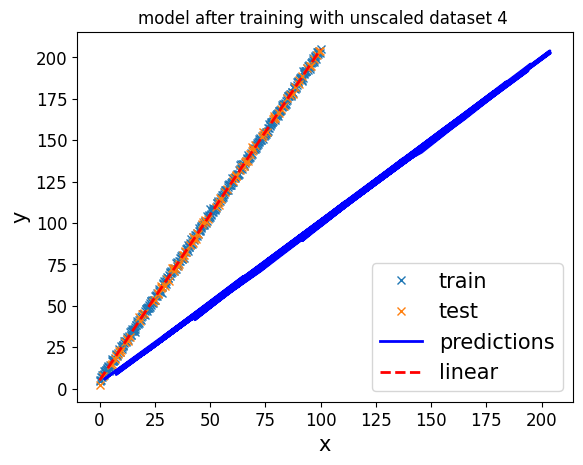

In [468]:
plt.plot(train_data4.x ,train_data4.y, 'x', label = 'train')
plt.plot(test_data4.x, test_data4.y, 'x', label = 'test')

# Plot the predicted data 
plt.plot(test_y_unscaled, y_pred_test4_unscaled,c="blue", label = 'predictions',linewidth=2)
plt.plot(x4,y_orig4,  label = 'linear',c="red",linestyle="dashed",linewidth=2)
plt.legend(fontsize=15)

plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("model after training with unscaled dataset 4 ")
plt.show()